In [1]:
from pynth import *

from math import *
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
Oscillator    # 振荡器
Effect        # 效果器
Instrument    # 乐器
AudioCompiler # 音频编译器
Score         # 乐谱

pynth.score.Score

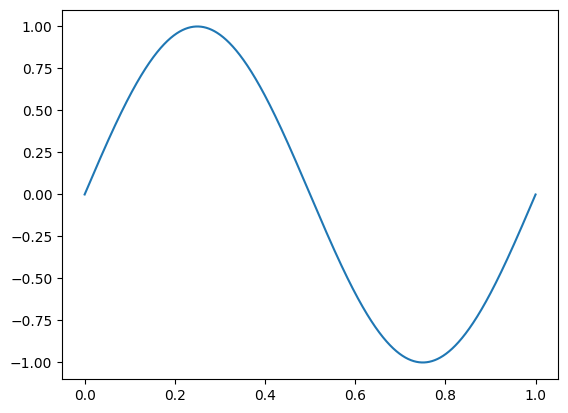

In [3]:
class Sin(Oscillator):
    def take(self, p):
        return np.sin(2 * pi * p)

Sin().plot()
# Instrument(wav=Sin()).audio(freq=440, dur=1)
AudioCompiler().audio(Instrument(wav=Sin()), 120, [C(4)/4, +C, -C])

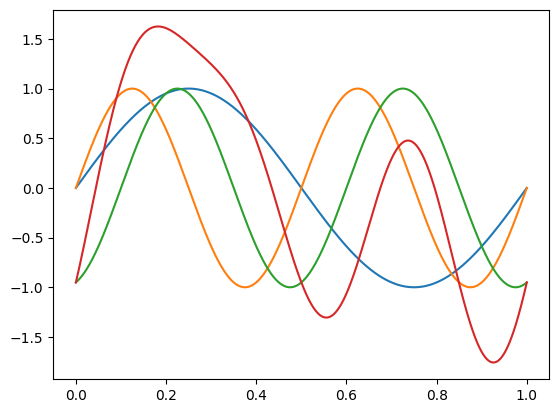

In [4]:
class Sin(Oscillator):
    def __init__(self, n=1, p=0):
        self.n = n
        self.p = p

    def take(self, p):
        return np.sin(2 * pi * self.n * (p - self.p))


class Normalize(Effect):
    def apply(self, data):
        return normalize(data)


Sin().plot()
Sin(n=2).plot()
Sin(n=2, p=0.1).plot()

wav = Sin() + Sin(2, 0.1) + Sin(3)*0.5
wav.plot()
Instrument(wav=wav, fx=Normalize()).audio()

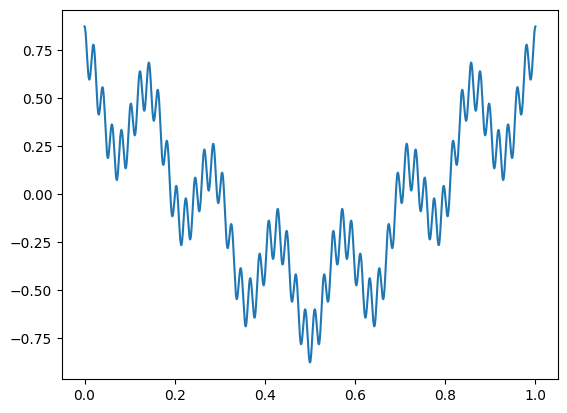

In [5]:
from scipy import signal

class Weierstrass(Oscillator):
    def __init__(self, n, a, b):
        self.n = n
        self.a = a
        self.b = b

    def take(self, p):
        return sum(map(lambda n: self.a**n * cos(self.b**n * pi * p * 2) / 2, range(self.n)))


class Lowpass(Effect):
    def __init__(self, f, n=2, sr=SAMPLING_RATE):
        self.b, self.a = signal.butter(n, f, 'lowpass', fs=sr)
    
    def apply(self, data):
        return signal.filtfilt(self.b, self.a, data)


wav = Weierstrass(3, 0.5, 7)
wav.plot()

ipd.display(Instrument(wav=wav).audio())
ipd.display(Instrument(wav=wav, fx=Lowpass(2000)).audio())

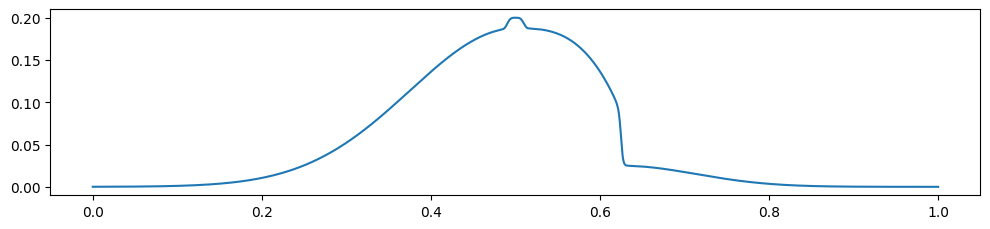

In [6]:
class NagoyaOppai(Oscillator):
    def __init__(self, t=0):
        self.t = t

    def take(self, p):
        x = p * 8 - 4
        sint = sin(self.t)
        y = 0
        y += 1.5 * exp((0.12*sint - 0.5) * (x - 0.16*sint)**2) / (1 + exp(20 * (5 * x - sint)))
        y += (1.5 - 0.8 * (x - 0.2 * sint)**3) * (1 + exp(20 * (sint - 5 * x)))**-1 / (1 + exp(100 * (x - 1) - 16 * sint))
        y += 0.2 * (exp(-(x - 1)**2)) / (1 + exp(100 * (1 - x) + 16 * sint))
        v = 2 * (10 * x - 1.2 * (2 + sint) * sint)**4
        y += 0 if v > 100 else 0.1 / exp(v)
        y /= 8
        return y


plt.figure(figsize=[12, 3])
plt.axes().set_aspect('equal')
NagoyaOppai().plot()

AudioCompiler().audio(Instrument(wav=Weierstrass(3, 0.5, 7), amp=NagoyaOppai(), freq=NagoyaOppai() + 1, fx=Lowpass(2000)), 68,
    [C(4)/4, D, E, F, G, A, B, C(5)])